In [167]:
import pandas as pd
import joblib

test_df = pd.read_csv("../../tests/data/user/full_features.csv")

model = joblib.load("../../models/final_model.pkl")

test_df.head()

,latitude,longitude,gravity_iso_residual,gravity_cscba,gravity_cscba_1vd,gravity_iso_residual_stddev3x3,gravity_cscba_stddev3x3,mag_uc_1_2km,mag_uc_2_4km,mag_uc_4_8km,...,mag_uc_12_16km,mag_uc_2_4km_1vd,mag_uc_2_4km_thd,mag_uc_2_4km_stddev3x3,radio_k_pct,radio_th_ppm,radio_u_ppm,radio_th_k_ratio,radio_u_k_ratio,radio_u_th_ratio
0,-2.812368e+06,613219.853382,-126.261887,-629.010254,-157.416031,2.519649,49.774807,-2.804662,-3.995065,-4.444890,...,-1.324313,0.001612,0.001880,0.048209,0.811729,4.490281,0.513127,5.537009,0.635506,0.114698
1,-2.792368e+06,613219.853382,-3.014073,928.356628,-36.838493,0.580136,18.706617,2.639284,4.224967,4.643408,...,0.147913,0.002127,0.003594,0.091942,0.791167,4.526412,0.740271,5.721338,0.935621,0.163544
2,-2.772368e+06,613219.853382,-58.362629,75.607094,-95.609016,1.796331,84.656700,-0.282466,-0.682296,-2.121426,...,-1.866252,-0.002269,0.013888,0.354534,0.798998,4.873215,0.752883,6.102053,0.944233,0.154804
3,-2.752368e+06,613219.853382,-77.537842,-185.164322,-120.229721,1.254095,51.769508,-4.940376,-5.775164,-6.300296,...,-4.211301,0.004499,0.009062,0.234139,0.794997,5.040666,0.675712,6.341320,0.854023,0.135451
4,-2.732368e+06,613219.853382,-85.702789,23.804832,-134.967087,0.661069,18.614502,-1.876285,-4.620224,-9.304559,...,-7.403680,0.002824,0.002828,0.072569,0.838504,5.265018,0.824097,6.288646,0.985647,0.156350


In [168]:
for col in test_df.columns:
    test_df[col] = test_df[col].transform(lambda x: x.fillna(x.median()))

In [169]:
# Apply scaling to all features
scaler = joblib.load("../../models/robust_scaler_no_transform.pkl")
scaled_features = scaler.transform(test_df.drop(columns=['longitude', 'latitude']))
scaled_df = pd.DataFrame(scaled_features, columns=test_df.drop(columns=['longitude', 'latitude']).columns)

In [170]:
scaled_df['longitude'] = test_df['longitude']
scaled_df['latitude'] = test_df['latitude']
scaled_df.head()

,gravity_iso_residual,gravity_cscba,gravity_cscba_1vd,gravity_iso_residual_stddev3x3,gravity_cscba_stddev3x3,mag_uc_1_2km,mag_uc_2_4km,mag_uc_4_8km,mag_uc_8_12km,mag_uc_12_16km,...,mag_uc_2_4km_thd,mag_uc_2_4km_stddev3x3,radio_k_pct,radio_th_ppm,radio_u_ppm,radio_th_k_ratio,radio_u_k_ratio,radio_u_th_ratio,longitude,latitude
0,-0.480083,-0.290422,0.091895,0.756568,-0.003439,-0.125059,-0.136992,-0.111713,-0.072889,-0.063641,...,-0.341367,-0.344273,0.373568,-0.584058,-0.886360,-0.567042,-0.664053,-0.304287,613219.853382,-2.812368e+06
1,-0.089623,0.851066,0.461222,-0.525374,-0.388342,0.272957,0.261561,0.209700,0.118439,0.031033,...,-0.310005,-0.313064,0.341877,-0.577018,-0.470222,-0.551857,-0.486634,0.610777,613219.853382,-2.792368e+06
2,-0.264972,0.226034,0.281209,0.278484,0.428713,0.059343,0.023630,-0.029543,-0.066561,-0.098491,...,-0.121712,-0.125676,0.353946,-0.509447,-0.447116,-0.520494,-0.481542,0.447046,613219.853382,-2.772368e+06
3,-0.325721,0.034899,0.205796,-0.079914,0.021274,-0.281204,-0.223301,-0.177331,-0.195293,-0.249293,...,-0.209985,-0.211591,0.347779,-0.476821,-0.588496,-0.500783,-0.534872,0.084495,613219.853382,-2.752368e+06
4,-0.351588,0.188065,0.160656,-0.471881,-0.389483,-0.057184,-0.167303,-0.283579,-0.376217,-0.454585,...,-0.324023,-0.326890,0.414836,-0.433108,-0.316649,-0.505122,-0.457060,0.476009,613219.853382,-2.732368e+06


In [171]:
X = scaled_df.drop(columns=["latitude", "longitude"])

In [172]:
X.head()

,gravity_iso_residual,gravity_cscba,gravity_cscba_1vd,gravity_iso_residual_stddev3x3,gravity_cscba_stddev3x3,mag_uc_1_2km,mag_uc_2_4km,mag_uc_4_8km,mag_uc_8_12km,mag_uc_12_16km,mag_uc_2_4km_1vd,mag_uc_2_4km_thd,mag_uc_2_4km_stddev3x3,radio_k_pct,radio_th_ppm,radio_u_ppm,radio_th_k_ratio,radio_u_k_ratio,radio_u_th_ratio
0,-0.480083,-0.290422,0.091895,0.756568,-0.003439,-0.125059,-0.136992,-0.111713,-0.072889,-0.063641,0.081425,-0.341367,-0.344273,0.373568,-0.584058,-0.886360,-0.567042,-0.664053,-0.304287
1,-0.089623,0.851066,0.461222,-0.525374,-0.388342,0.272957,0.261561,0.209700,0.118439,0.031033,0.105067,-0.310005,-0.313064,0.341877,-0.577018,-0.470222,-0.551857,-0.486634,0.610777
2,-0.264972,0.226034,0.281209,0.278484,0.428713,0.059343,0.023630,-0.029543,-0.066561,-0.098491,-0.096919,-0.121712,-0.125676,0.353946,-0.509447,-0.447116,-0.520494,-0.481542,0.447046
3,-0.325721,0.034899,0.205796,-0.079914,0.021274,-0.281204,-0.223301,-0.177331,-0.195293,-0.249293,0.214092,-0.209985,-0.211591,0.347779,-0.476821,-0.588496,-0.500783,-0.534872,0.084495
4,-0.351588,0.188065,0.160656,-0.471881,-0.389483,-0.057184,-0.167303,-0.283579,-0.376217,-0.454585,0.137109,-0.324023,-0.326890,0.414836,-0.433108,-0.316649,-0.505122,-0.457060,0.476009


In [173]:
test_df["prediction"] = model.predict_proba(X)[:, 1]
test_df.to_csv("../../data/test/test_full_features_qld_with_prediction.csv", index=False)

In [200]:
top_n = 20
top_df = test_df.sort_values(by="prediction", ascending=False).head(top_n).copy()
top_df

,latitude,longitude,gravity_iso_residual,gravity_cscba,gravity_cscba_1vd,gravity_iso_residual_stddev3x3,gravity_cscba_stddev3x3,mag_uc_1_2km,mag_uc_2_4km,mag_uc_4_8km,...,mag_uc_2_4km_1vd,mag_uc_2_4km_thd,mag_uc_2_4km_stddev3x3,radio_k_pct,radio_th_ppm,radio_u_ppm,radio_th_k_ratio,radio_u_k_ratio,radio_u_th_ratio,prediction
4230,-3.072368e+06,1.993220e+06,356.776337,-621.254272,124.234566,1.711633,70.619583,3.280843,13.900475,9.707584,...,0.099166,0.106549,2.732340,1.151637,5.860818,1.162971,5.088419,1.012096,0.199359,0.993228
3853,-2.452368e+06,1.753220e+06,315.938904,-1015.866455,175.162704,2.721443,101.519089,1.640303,-6.430562,1.790204,...,0.082204,0.133992,3.419420,1.638482,7.896697,0.911769,4.810284,0.556557,0.115143,0.988713
4253,-3.072368e+06,2.013220e+06,335.714233,-1907.843018,155.442764,2.764168,82.092934,22.971369,29.523165,18.981466,...,0.042512,0.078313,1.994928,2.020131,14.279277,1.938564,7.124015,0.978692,0.136465,0.988713
3406,-2.332368e+06,1.573220e+06,236.995392,-920.577942,30.013718,2.398730,72.354599,62.430676,28.144022,10.084793,...,0.013461,0.121069,3.121551,2.593393,15.268268,2.218157,5.897858,0.857888,0.145571,0.986080
4236,-2.952368e+06,1.993220e+06,299.108734,-422.612457,128.262970,2.598076,92.291573,-61.866638,-32.731659,2.483063,...,0.012471,0.140763,3.633308,1.624807,8.550519,1.188212,5.260421,0.733672,0.139779,0.983634
4190,-2.892368e+06,1.953220e+06,262.869263,-5268.748535,80.269913,3.165981,300.522888,22.754494,57.317402,72.157524,...,-0.001999,0.231417,5.919339,2.490853,13.385358,1.668813,5.378984,0.670395,0.124706,0.980813
4154,-3.092368e+06,1.933220e+06,326.092072,-908.674133,-22.956945,1.175931,92.152046,109.011574,69.167007,34.281528,...,0.299478,0.299620,7.679970,1.182703,6.623232,1.160362,5.670749,0.987065,0.175519,0.980813
138,-2.372368e+06,6.732199e+05,185.542099,-39.626587,10.345540,3.102418,91.504105,34.105904,64.218803,85.897606,...,-0.006621,0.119227,3.040498,1.340533,12.436981,1.745142,9.289240,1.308320,0.141053,0.980625
3624,-2.252368e+06,1.653220e+06,290.199066,-1544.685181,208.786011,1.769975,109.936348,-14.781878,-14.068596,-7.485269,...,0.040644,0.521852,13.330817,2.019323,11.900088,1.251632,5.887049,0.620289,0.105608,0.980060
4216,-2.852368e+06,1.973220e+06,216.231567,-2357.892334,80.346634,2.272457,91.847702,-6.633574,20.841364,33.846203,...,-0.171692,0.182030,4.657607,2.596573,12.329408,1.466864,4.790022,0.566349,0.120201,0.979684


In [202]:
import geopandas as gpd
from shapely.geometry import Point


geometry_all = [Point(xy) for xy in zip(test_df["longitude"], test_df["latitude"])]
gdf_all = gpd.GeoDataFrame(test_df, geometry=geometry_all, crs="EPSG:3577")


geometry_top = [Point(xy) for xy in zip(top_df["longitude"], top_df["latitude"])]
gdf_top = gpd.GeoDataFrame(top_df, geometry=geometry_top, crs="EPSG:3577")


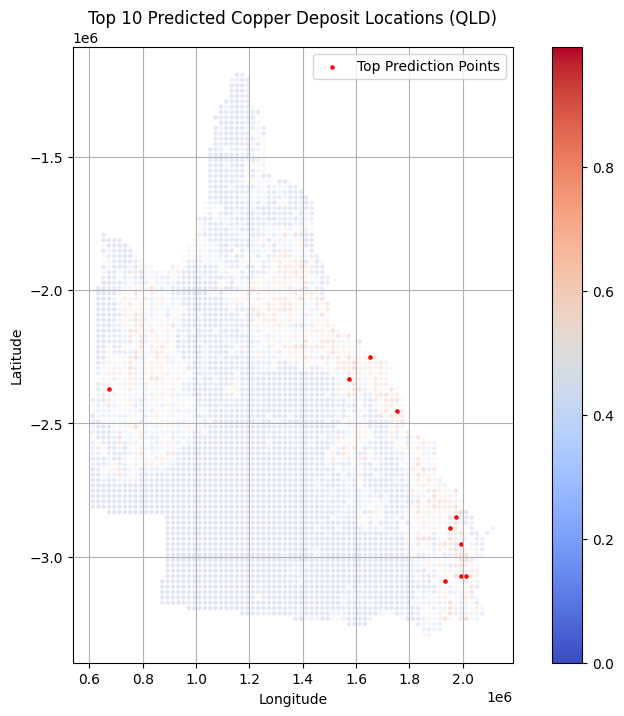

In [178]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))


gdf_all.plot(column="prediction", cmap="coolwarm", legend=True, markersize=5, ax=ax, alpha=0.1)

gdf_top.plot(color="red", markersize=5, ax=ax, label="Top Prediction Points")


#for idx, row in gdf_top.iterrows():
#    ax.annotate(f"{row['prediction']:.2f}", xy=(row.geometry.x, row.geometry.y), xytext=(3, 3),
#                textcoords="offset points", fontsize=8, color="black")

plt.title(f"Top {top_n} Predicted Copper Deposit Locations (QLD)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.show()


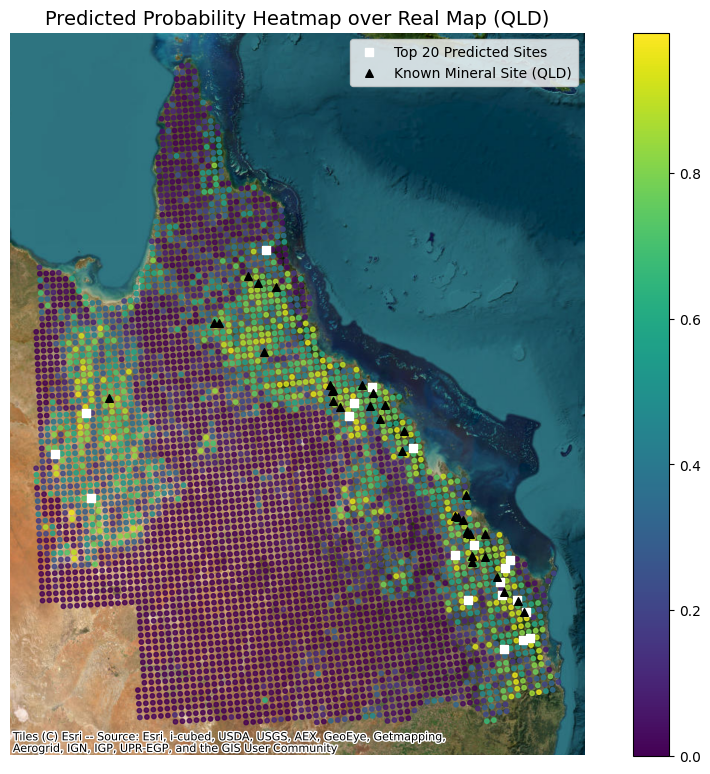

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx


known_df = pd.read_csv("../../data/processed/positive_core_clean.csv")
known_gdf = gpd.GeoDataFrame(
    known_df,
    geometry=gpd.points_from_xy(known_df["LONGITUDE"], known_df["LATITUDE"]),
    crs="EPSG:4326"
)
# CRS transformation
known_gdf = known_gdf.to_crs(gdf_all.crs)

# gain the bounding box of gdf_all
minx, miny, maxx, maxy = gdf_all.total_bounds
bounding_poly = box(minx, miny, maxx, maxy)

# filter the known_gdf to only include points within the bounding box of gdf_all
known_gdf_qld = known_gdf[known_gdf.geometry.within(bounding_poly)].copy()

# Convert all GeoDataFrames to EPSG:3857 (Web Mercator)
gdf_all = gdf_all.to_crs(epsg=3857)
gdf_top = gdf_top.to_crs(epsg=3857)
known_gdf_qld = known_gdf_qld.to_crs(epsg=3857)

# Plotting the heatmap and filtered known sites
fig, ax = plt.subplots(figsize=(10, 8))

# predicted probabilities heatmap
gdf_all.plot(ax=ax, column="prediction", cmap="viridis", legend=True, markersize=10, alpha=0.8)
gdf_top.plot(ax=ax, color='white', marker='s', markersize=30, label='Top 20 Predicted Sites')

# qld known sites
known_gdf_qld.plot(ax=ax, color='black', marker='^', markersize=30, label='Known Mineral Site (QLD)')
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)


ax.set_title("Predicted Probability Heatmap over Real Map (QLD)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.legend()
plt.show()


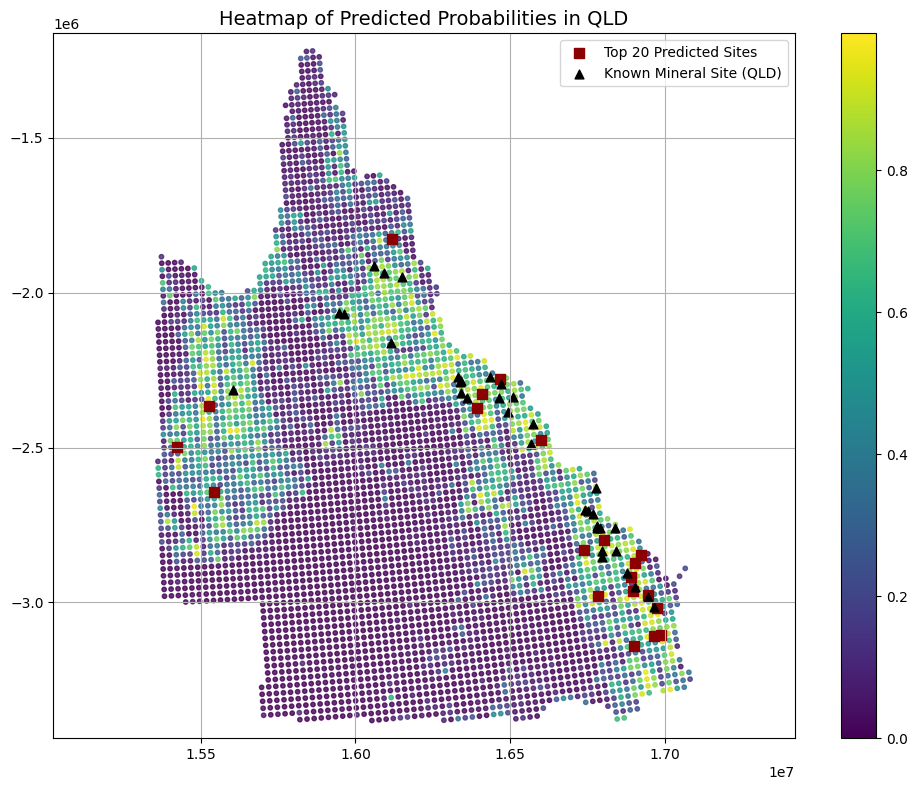

In [227]:
import matplotlib.pyplot as plt
from shapely.geometry import box

# CRS transformation
known_gdf = known_gdf.to_crs(gdf_all.crs)

# gain the bounding box of gdf_all
minx, miny, maxx, maxy = gdf_all.total_bounds
bounding_poly = box(minx, miny, maxx, maxy)

# filter the known_gdf to only include points within the bounding box of gdf_all
known_gdf_qld = known_gdf[known_gdf.geometry.within(bounding_poly)].copy()

# Plotting the heatmap and filtered known sites
fig, ax = plt.subplots(figsize=(10, 8))

# predicted probabilities heatmap
gdf_all.plot(ax=ax, column="prediction", cmap="viridis", legend=True, markersize=10, alpha=0.8)
gdf_top.plot(ax=ax, color='darkred', marker='s', markersize=50, label='Top 20 Predicted Sites')

# qld known sites
known_gdf_qld.plot(ax=ax, color='black', marker='^', markersize=40, label='Known Mineral Site (QLD)')

# Add OpenStreetMap basemap
ax.set_title("Heatmap of Predicted Probabilities in QLD", fontsize=14)
ax.legend()
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.show()
